# Problem
Online Retailer Customer Segmentation and Analysis

We are going to perform an exploratory data  analysis for an online retail store data set, in order to understand its customers.

 * How can I scale my current business that is doing really well, in the most effective way?
 * What type of marketing initiatives can we perform for each customer in order to get the best ROI?”
    
# Data

https://raw.githubusercontent.com/anilak1978/ecommerce/master/OnlineRetail.csv"

# Eval
* Monthly Revenue Overview
* Monthly Items Sold Overview
* Monthly Active Customers
* Average Revenue per Month
* New vs Existing Users
* Customer Segmentation
*   1)Recency gives us how recently customers make a purchase, 
*   2)Frequency, how often they make a purchase, and 
*   3)Monetary Value shows us how often do they spend.


# features 
   InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'InvoiceMonth',
       'InvoiceYear'

# modelling

# Evaluation


Data Collection and Cleaning

In [1]:
%%time
# Import Standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the available data and overview
df=pd.read_csv("https://raw.githubusercontent.com/anilak1978/ecommerce/master/OnlineRetail.csv", encoding="ISO-8859-1",low_memory=False)
df.head()

Wall time: 4min 25s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#import pandas_profiling as pp
#pp.ProfileReport(df)

In [7]:
df.shape

(541909, 8)

In [8]:
# Look for datatypes
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
# Look for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# Add Revenue variable and update InvoiceDate 
df["Revenue"]=df["UnitPrice"]*df["Quantity"]
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"]).dt.date
df["InvoiceMonth"]=pd.DatetimeIndex(df["InvoiceDate"]).month
df["InvoiceYear"]=pd.DatetimeIndex(df["InvoiceDate"]).year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,12,2010


In [11]:
df.shape

(541909, 11)

Data Exploration

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID,Revenue,InvoiceMonth,InvoiceYear
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795,7.553128,2010.921609
std,218.081158,96.759853,1713.600303,378.810824,3.509055,0.268787
min,-80995.000000,-11062.060000,12346.000000,-168469.600000,1.000000,2010.000000
25%,1.000000,1.250000,13953.000000,3.400000,5.000000,2011.000000
50%,3.000000,2.080000,15152.000000,9.750000,8.000000,2011.000000
75%,10.000000,4.130000,16791.000000,17.400000,11.000000,2011.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,12.000000,2011.000000


# Monthly Revenue Overview

Text(0, 0.5, 'Revenue')

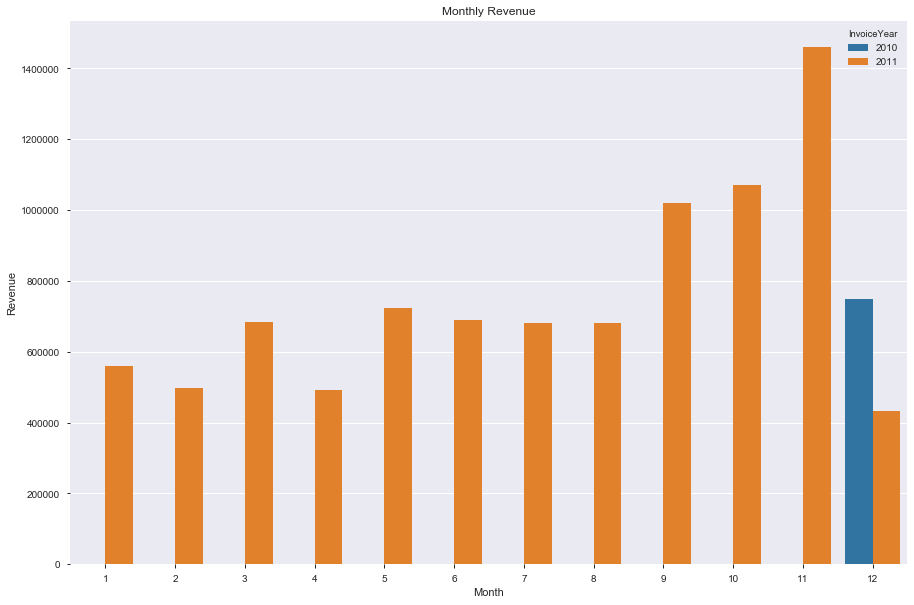

In [33]:
%matplotlib inline
#Monthly Revenue Overview
df_revenue=df.groupby(["InvoiceMonth", "InvoiceYear"])["Revenue"].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Revenue", hue="InvoiceYear", data=df_revenue)
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")

# Monthly Revenue Overview (lineplot)

Text(26.885127314814824, 0.5, 'Revenue')

<Figure size 432x288 with 0 Axes>

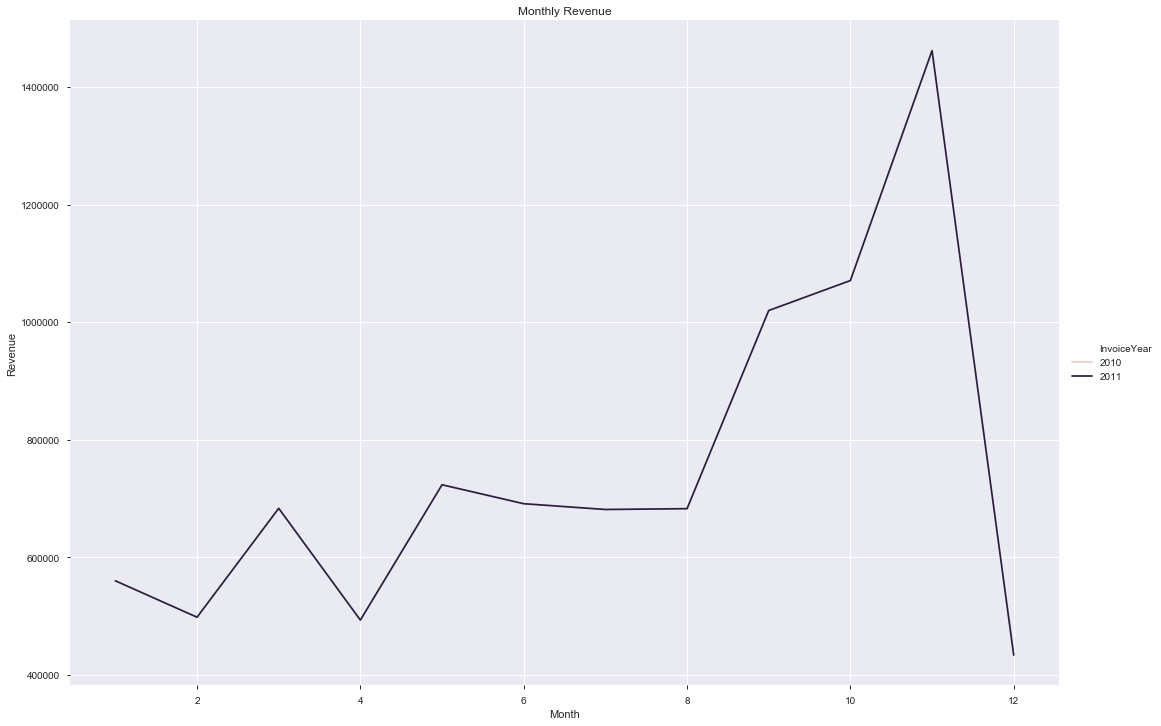

In [14]:

plt.figure()
sns.relplot(x="InvoiceMonth", y="Revenue", hue="InvoiceYear", kind="line", data=df_revenue, height=10, aspect=15/10)
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")

we realize that our data set starts in December 2010 and goes all the way to December 2011. We notice that the revenue slumps around December 2011. We need to see if this is due to customers not purchasing our merchandise or if it is related to an issue within the dataset.

In [15]:
# Look at the December 2011 data
df_december_2011=df.query("InvoiceMonth==12 and InvoiceYear==2011")
df_december_2011

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear
516384,C579889,23245,SET OF 3 REGENCY CAKE TINS,-8,2011-12-01,4.15,13853.0,United Kingdom,-33.20,12,2011
516385,C579890,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,-1,2011-12-01,1.25,15197.0,United Kingdom,-1.25,12,2011
516386,C579890,23374,RED SPOT PAPER GIFT BAG,-1,2011-12-01,0.82,15197.0,United Kingdom,-0.82,12,2011
516387,C579890,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,-2,2011-12-01,0.85,15197.0,United Kingdom,-1.70,12,2011
516388,C579891,23485,BOTANICAL GARDENS WALL CLOCK,-1,2011-12-01,25.00,13644.0,United Kingdom,-25.00,12,2011
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,12,2011


Based on the december 2011 data, we understand that the data set does not include any purchases after December 9th 2011. We need to make sure, we consider this within our analysis and conclusion.
On a separate note; we can see that the revenue grows steadily starting from September 2011 all the way up to December 2011, November being the best month in terms of revenue.

# Monthly Items Sold Overview

Text(0, 0.5, 'Items Sold')

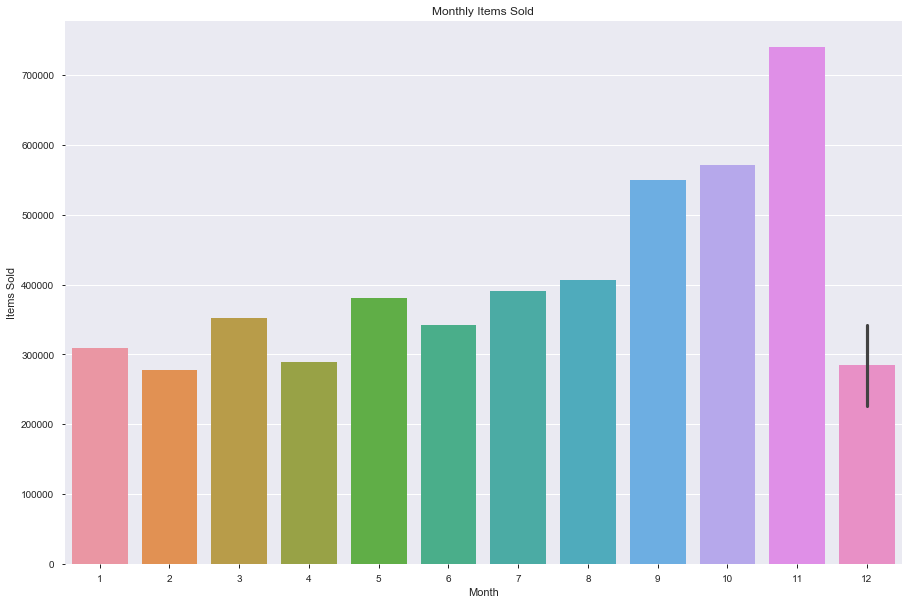

In [35]:
# Monthly Items Sold Overview
df_quantity=df.groupby(["InvoiceMonth", "InvoiceYear"])["Quantity"].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Quantity", data=df_quantity)
plt.title("Monthly Items Sold")
plt.xlabel("Month")
plt.ylabel("Items Sold")

In [17]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'InvoiceMonth',
       'InvoiceYear'],
      dtype='object')

# Monthly Active Customers

Text(0, 0.5, 'Active Users')

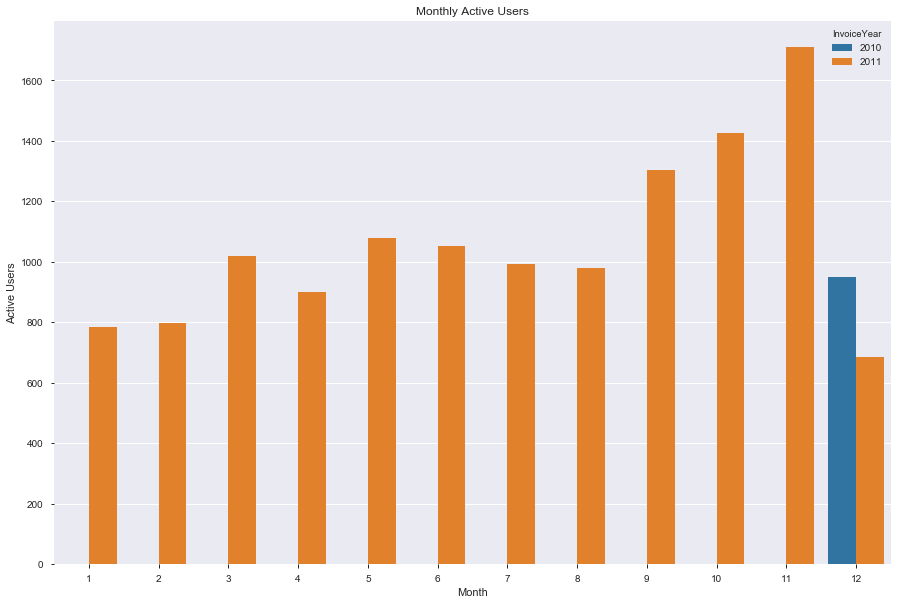

In [18]:
# Monthly Active Customers
df_active=df.groupby(["InvoiceMonth", "InvoiceYear"])["CustomerID"].nunique().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="CustomerID", hue="InvoiceYear", data=df_active)
plt.title("Monthly Active Users")
plt.xlabel("Month")
plt.ylabel("Active Users")

# Average Revenue per Month

Text(0, 0.5, 'Revenue')

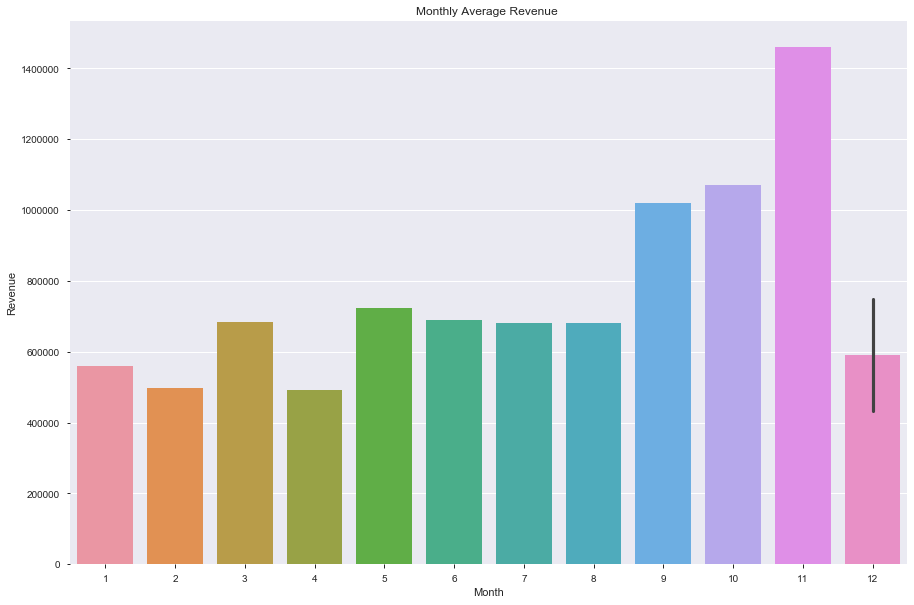

In [19]:
# Average Revenue per Month
df_revenue_avg=df.groupby(["InvoiceMonth", "InvoiceYear"])["Revenue"].mean().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="InvoiceMonth", y="Revenue", data=df_revenue)
plt.title("Monthly Average Revenue ")
plt.xlabel("Month")
plt.ylabel("Revenue")

# New vs Existing Users

Text(24.57344553755145, 0.5, 'Revenue')

<Figure size 432x288 with 0 Axes>

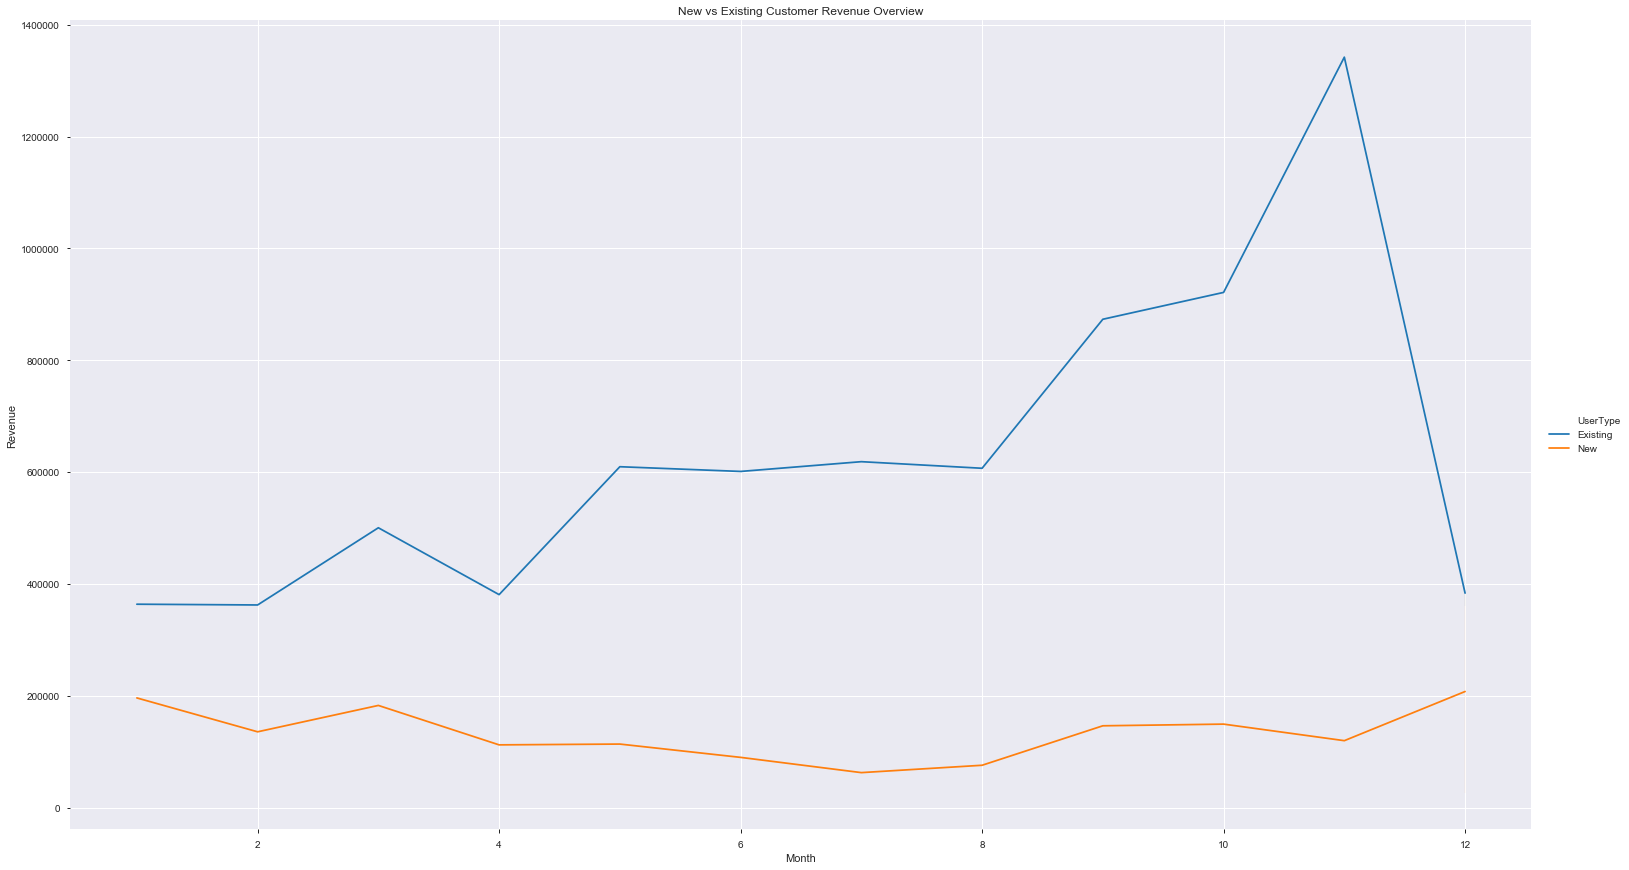

In [20]:
# New vs Existing Users
df_first_purchase=df.groupby(["CustomerID"])["InvoiceDate"].min().reset_index()
df_first_purchase.columns=["CustomerID", "FirstPurchaseDate"]
df=pd.merge(df, df_first_purchase, on="CustomerID")
df["UserType"]="New"
df.loc[df["InvoiceDate"]>df["FirstPurchaseDate"], "UserType"]="Existing"

df.head()
# New vs Existing User Revenue Analysis
df_new_revenue=df.groupby(["InvoiceMonth", "InvoiceYear", "UserType"])["Revenue"].sum().reset_index()
plt.figure()
sns.relplot(x="InvoiceMonth", y="Revenue", hue="UserType", data=df_new_revenue, kind="line", height=12, aspect=18/10)
plt.title("New vs Existing Customer Revenue Overview")
plt.xlabel("Month")
plt.ylabel("Revenue")

# Customer Segmentation

 We can also segment our customers in order to target our actions based on the main business problem we are working to solve.

We are going to use the RFM (Recency, Frequency and Monetary Value) strategy to analyze and estimate

* Recency gives us how recently customers make a purchase, 
* Frequency, how often they make a purchase, and 
* Monetary Value shows us how often do they spend.

In [21]:
# Recency Calculation
df_user=pd.DataFrame(df["CustomerID"].unique())
df_user.columns=["CustomerID"]
df_last_purchase=df.groupby(["CustomerID"])["InvoiceDate"].max().reset_index()
df_last_purchase.columns=["CustomerID", "LastPurchaseDate"]
df_last_purchase["Recency"]= (df_last_purchase["LastPurchaseDate"].max()-df_last_purchase["LastPurchaseDate"]) .dt.days
df_recency=pd.merge(df_user, df_last_purchase[["CustomerID", "Recency"]])
df_recency.head()

,CustomerID,Recency
0,17850.0,302
1,13047.0,31
2,12583.0,2
3,13748.0,95
4,15100.0,330


 Look at the distribution of Recency

Text(0, 0.5, 'Customer Count')

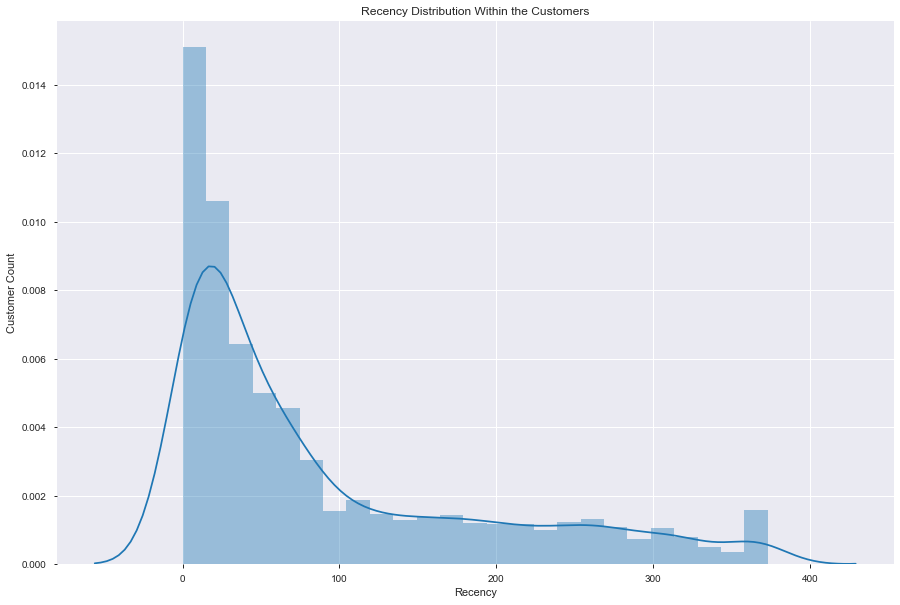

In [22]:
# Look at the distribution of Recency
plt.figure(figsize=(15,10))
sns.distplot(df_recency["Recency"])
plt.title("Recency Distribution Within the Customers")
plt.xlabel("Recency")
plt.ylabel("Customer Count")

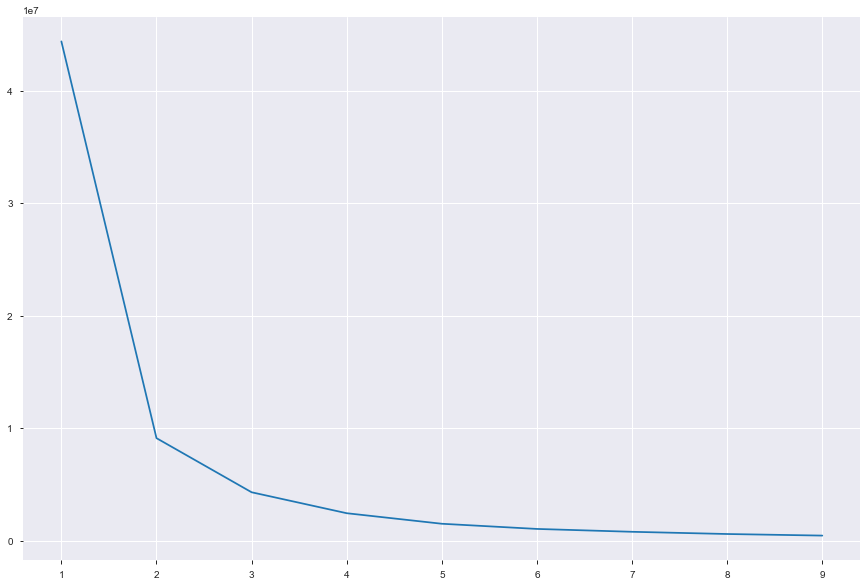

In [23]:
# use KMeans Clustering for Recency Clustering
from sklearn.cluster import KMeans
# find out how many clusters are optimal
y=df_recency[["Recency"]] # label what we are clustering
dic={} # store the clustering values in a dictionary
for k in range(1,10):
    kmeans=KMeans(n_clusters=k, max_iter=1000).fit(y)
    y["clusters"]=kmeans.labels_
    dic[k]=kmeans.inertia_
plt.figure(figsize=(15,10))
plt.plot(list(dic.keys()), list(dic.values()))
plt.show()

In [24]:
# Cluster Customer based on Recency
kmodel_recency=KMeans(n_clusters=4)
kmodel_recency.fit(y)
kpredict_recency=kmodel_recency.predict(y)
kpredict_recency[0:5]
df_recency["RecencyCluster"]=kpredict_recency
df_recency.head()

,CustomerID,Recency,RecencyCluster
0,17850.0,302,0
1,13047.0,31,2
2,12583.0,2,2
3,13748.0,95,1
4,15100.0,330,0


In [25]:
# get statistical analysis for each cluster
df_recency.groupby(["RecencyCluster"])["Recency"].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,506.0,309.381423,39.175649,250.0,275.0,306.0,351.0,373.0
1,1080.0,79.451852,23.864879,49.0,60.0,73.0,95.0,134.0
2,2158.0,17.908248,13.208956,0.0,7.0,16.0,29.0,47.0
3,629.0,189.812401,33.042818,135.0,161.0,187.0,217.0,249.0


# frequency of orders

In [26]:
# frequency of orders
df_frequency=df.groupby(["CustomerID"])["InvoiceDate"].count().reset_index()
df_frequency.columns=["CustomerID", "Frequency"]
df_frequency=pd.merge(df_user, df_frequency, on="CustomerID")
df_frequency.head()

,CustomerID,Frequency
0,17850.0,312
1,13047.0,196
2,12583.0,251
3,13748.0,28
4,15100.0,6


Text(0, 0.5, 'Count')

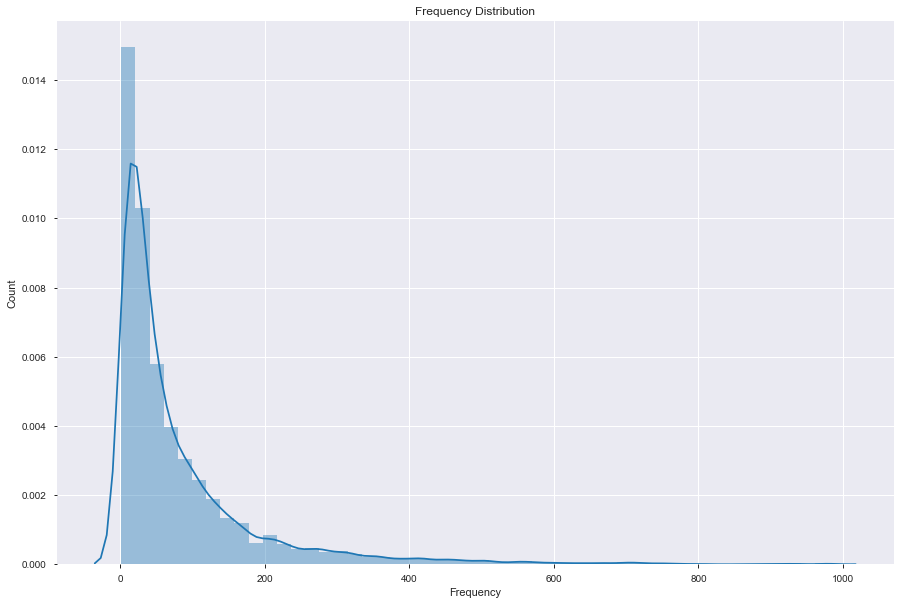

In [27]:
# Review of Frequency Distribution
plt.figure(figsize=(7,5))
sns.distplot(df_frequency.query("Frequency<1000")["Frequency"])
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

In [28]:
# Customer Segmentation based on Frequency
x=df_frequency[["Frequency"]]
k_model_frequency=KMeans(n_clusters=4)
k_model_frequency.fit(x)
k_model_frequency_predict=k_model_frequency.predict(x)
df_frequency["FrequencyCluster"]=k_model_frequency_predict
df_frequency.head()
# Statistical Analysis of clusters based on frequency
df_frequency.groupby(["FrequencyCluster"])["Frequency"].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,4052.0,57.741362,56.828243,1.0,16.0,36.0,83.25,260.0
1,1.0,135080.000000,NaN,135080.0,135080.0,135080.0,135080.00,135080.0
2,4.0,5914.000000,1473.845537,4642.0,5006.5,5515.5,6423.00,7983.0
3,316.0,472.167722,311.773127,261.0,306.0,374.5,502.25,2782.0


# Finally, we can segment our customers based on their monetary value.


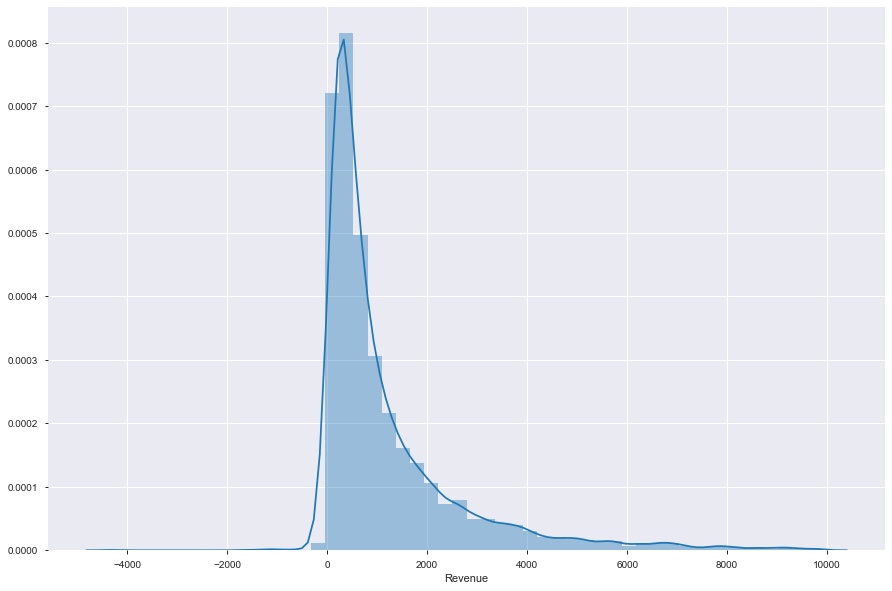

In [29]:
df_customer_revenue=df.groupby(["CustomerID"])["Revenue"].sum().reset_index()
df_customer_revenue=pd.merge(df_user, df_customer_revenue, on="CustomerID")
df_customer_revenue.head()
# Revenue Distribution
plt.figure(figsize=(15,10))
sns.distplot(df_customer_revenue.query("Revenue < 10000")["Revenue"])

In [30]:
# Segmenting Customers Based on their Monetary Value
a=df_customer_revenue[["Revenue"]]
k_model_revenue=KMeans(n_clusters=4)
k_model_revenue.fit(a)
k_model_revenue_pred=k_model_revenue.predict(a)
df_customer_revenue["RevenueCluster"]=k_model_revenue_pred
df_customer_revenue.groupby(["RevenueCluster"])["Revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,4347.0,1.440839e+03,2473.463137,-4287.63,291.94,642.81,1574.285,30300.82
1,1.0,1.447682e+06,NaN,1447682.12,1447682.12,1447682.12,1447682.120,1447682.12
2,3.0,2.411366e+05,47874.073443,187482.17,221960.33,256438.49,267963.755,279489.02
3,22.0,5.969684e+04,29287.039236,31300.08,37348.76,52287.28,61844.660,132572.62
